# Лабораторная работа №13 Отбор признаков

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('E:\\Магистратура\\3\\Машинное обучение\\healthcare-dataset-stroke-data.csv', sep=',')
print(df.info(), "\n")
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None 



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [15]:
# отбор числовых колонок (Числовые признаки)

df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)
print(df_numeric)

['id' 'age' 'hypertension' 'heart_disease' 'avg_glucose_level' 'bmi'
 'stroke']
         id   age  hypertension  heart_disease  avg_glucose_level   bmi  \
0      9046  67.0             0              1             228.69  36.6   
1     51676  61.0             0              0             202.21   NaN   
2     31112  80.0             0              1             105.92  32.5   
3     60182  49.0             0              0             171.23  34.4   
4      1665  79.0             1              0             174.12  24.0   
...     ...   ...           ...            ...                ...   ...   
5105  18234  80.0             1              0              83.75   NaN   
5106  44873  81.0             0              0             125.20  40.0   
5107  19723  35.0             0              0              82.99  30.6   
5108  37544  51.0             0              0             166.29  25.6   
5109  44679  44.0             0              0              85.28  26.2   

      stroke  
0   

In [16]:
# отбор нечисловых колонок (Категориальные признаки)

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)
print(df_non_numeric)

['gender' 'ever_married' 'work_type' 'Residence_type' 'smoking_status']
      gender ever_married      work_type Residence_type   smoking_status
0       Male          Yes        Private          Urban  formerly smoked
1     Female          Yes  Self-employed          Rural     never smoked
2       Male          Yes        Private          Rural     never smoked
3     Female          Yes        Private          Urban           smokes
4     Female          Yes  Self-employed          Rural     never smoked
...      ...          ...            ...            ...              ...
5105  Female          Yes        Private          Urban     never smoked
5106  Female          Yes  Self-employed          Urban     never smoked
5107  Female          Yes  Self-employed          Rural     never smoked
5108    Male          Yes        Private          Rural  formerly smoked
5109  Female          Yes       Govt_job          Urban          Unknown

[5110 rows x 5 columns]


In [17]:
# Методы фильтрации

# Сбор информации

X=df_numeric.iloc[:,:5]
y=df_numeric.iloc[:,6]
print(X, y)

df_numeric_del= df_numeric.dropna()
df_numeric_del

         id   age  hypertension  heart_disease  avg_glucose_level
0      9046  67.0             0              1             228.69
1     51676  61.0             0              0             202.21
2     31112  80.0             0              1             105.92
3     60182  49.0             0              0             171.23
4      1665  79.0             1              0             174.12
...     ...   ...           ...            ...                ...
5105  18234  80.0             1              0              83.75
5106  44873  81.0             0              0             125.20
5107  19723  35.0             0              0              82.99
5108  37544  51.0             0              0             166.29
5109  44679  44.0             0              0              85.28

[5110 rows x 5 columns] 0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1
5,56669,81.0,0,0,186.21,29.0,1
...,...,...,...,...,...,...,...
5104,14180,13.0,0,0,103.08,18.6,0
5106,44873,81.0,0,0,125.20,40.0,0
5107,19723,35.0,0,0,82.99,30.6,0
5108,37544,51.0,0,0,166.29,25.6,0


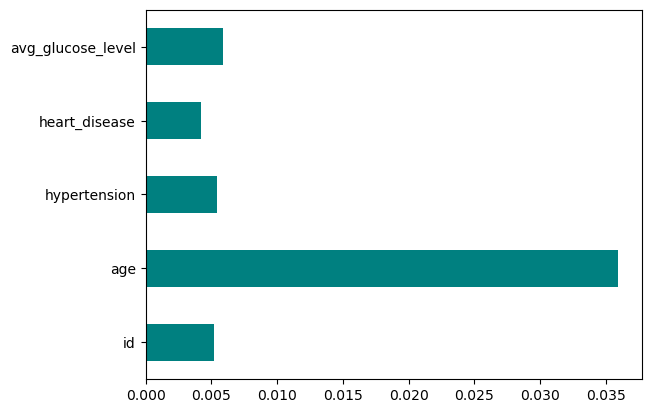

age                  0.035939
avg_glucose_level    0.005869
hypertension         0.005436
id                   0.005213
heart_disease        0.004236
dtype: float64

In [18]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X, y)
feature_importances = pd.Series(importances,X.columns)
feature_importances.plot(kind='barh', color='teal')
plt.show()
feature_importances.sort_values(ascending=False)

               Specs        Score
1                age  3635.226911
0                 id  2556.735918
4  avg_glucose_level  1718.285446
3      heart_disease    87.987436
2       hypertension    75.449498


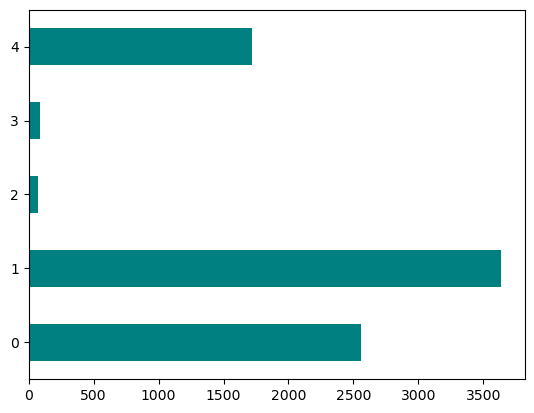

In [19]:
# Критерий хи-квадрат

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#объединим два фрейма данных для лучшей визуализации
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #название показателей
print(featureScores.nlargest(11,'Score'))
feature_importances = pd.Series(featureScores['Score'])
feature_importances.plot(kind='barh', color='teal')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# разбиваем набор данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df_numeric_del.drop('stroke',axis=1), df_numeric_del['stroke'], test_size=0.3, random_state=42)

# создаем список признаков
col_list = X_train.select_dtypes(include=['number']).columns
print(col_list)
print(X_train.shape, y_train.shape, "\n")

# вычисляем AUC для модели с одним признаком,
# используя перекрестную проверку
log = LogisticRegression(solver='liblinear')
auc=cross_val_score(log, X_train, y_train, cv=5, scoring='roc_auc', error_score='raise')

# превращаем список со значениями AUC в серию
auc_values = pd.Series(auc)
print(auc_values, "\n")

# сортируем по убыванию
auc_values = auc_values.sort_values(ascending=False)
print(auc_values)

x_1=X.iloc[:,auc_values.index]#3
x_1

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi'],
      dtype='object')
(3436, 6) (3436,) 

0    0.638745
1    0.760550
2    0.663019
3    0.676319
4    0.645458
dtype: float64 

1    0.760550
3    0.676319
2    0.663019
4    0.645458
0    0.638745
dtype: float64


,age,heart_disease,hypertension,avg_glucose_level,id
0,67.0,1,0,228.69,9046
1,61.0,0,0,202.21,51676
2,80.0,1,0,105.92,31112
3,49.0,0,0,171.23,60182
4,79.0,0,1,174.12,1665
...,...,...,...,...,...
5105,80.0,0,1,83.75,18234
5106,81.0,0,0,125.20,44873
5107,35.0,0,0,82.99,19723
5108,51.0,0,0,166.29,37544


In [22]:
# Методы обертки

# Рекурсивное исключение признаков

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

threshold = 5

lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=42, n_jobs=-1, max_iter=50)
rfe = RFE(lr, n_features_to_select=5)
rfe=rfe.fit(X, y)
# X_train, y_train - входные и выходные данные с обучающей выборки соответственно.
selector_ind = rfe.get_support()
df_rfe = X.iloc[:, selector_ind]
print(df_rfe.columns)

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level'], dtype='object')


In [23]:
# Встроенные методы

# Регуляризация LASSO

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Устанавливаем наш параметр регуляризации C=1
logistic = LogisticRegression(C=1, penalty="l1", solver='liblinear', random_state=7).fit(X, y)

# Где X, y - входные и выходные данные соответственно.
model = SelectFromModel(logistic, prefit=True)
X_new = model.transform(X)

# выводим финальную оценку прогнозирования.
selector_ind = model.get_support()
df_rfe1 = X.iloc[:, selector_ind]
print(df_rfe1.columns)


Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level'], dtype='object')


In [24]:
# Регуляризация Тихонова

from sklearn.linear_model import Ridge

n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
clf = Ridge(alpha=1.0)
clf.fit(X, y)
clf.coef_

array([ 0.51088991,  0.03729032, -0.65075201,  0.0930311 ,  0.93380887])

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import (train_test_split, cross_val_score, cross_validate)

# разбиваем набор данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df_numeric_del.drop('stroke', axis=1),df_numeric_del['stroke'],test_size=0.3,random_state=42)

# Сначала ищем оптимальный темп обучения для зафиксированного количества деревьев

# создаем экземляр класса LGBMClassifier
lgbm_model = LGBMClassifier(random_state=42,n_estimators=300)
# задаем сетку гиперпараметров
param_grid = {'learning_rate': [0.01, 0.05, 0.1]}

# создаем экземпляр класса GridSearchCV, передав
# конвейер, сетку гиперпараметров и указав
# количество блоков перекрестной проверки
gs = GridSearchCV(lgbm_model,param_grid, scoring='roc_auc', cv=5)
# выполняем поиск по всем значениям сетки
gs.fit(X_train, y_train);
# смотрим наилучшие значения гиперпараметров
print("Наилучшие значения гиперпараметров: {}".format( gs.best_params_))
# смотрим наилучшее значение AUC
print("Наилучшее значение AUC: {:.3f}".format(gs.best_score_))

[LightGBM] [Info] Number of positive: 109, number of negative: 2639
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 868
[LightGBM] [Info] Number of data points in the train set: 2748, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.039665 -> initscore=-3.186807
[LightGBM] [Info] Start training from score -3.186807
[LightGBM] [Info] Number of positive: 110, number of negative: 2639
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 867
[LightGBM] [Info] Number of data points in the train set: 2749, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040015 -> initscore=-3.177675
[LightGBM] [In

In [27]:
# создаем экземляр класса LGBMClassifier
lgbm_model2 = LGBMClassifier(random_state=42, n_estimators=300, learning_rate=0.01)

# задаем сетку гиперпараметров
param_grid2 = {
 'lambda_l1': [0, 10],
 'bagging_fraction': [0.5, 1],
 'feature_fraction': [0.5, 1]
}

gs2 = GridSearchCV(lgbm_model2,
 param_grid2,
 scoring='roc_auc',
 cv=5)

# выполняем поиск по всем значениям сетки
gs2.fit(X_train, y_train)
# смотрим наилучшие значения гиперпараметров
print('Наилучшие значения гиперпараметров:{}'.format(gs2.best_params_))
# смотрим наилучшее значение AUC
print('Наилучшее значение AUC: {:.3f}'.format(gs2.best_score_))

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Info] Number of positive: 109, number of negative: 2639
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 868
[LightGBM] [Info] Number of data points in the train set:

In [28]:
# Теперь вычислим важности признаков на основе информационного выигрыша.

# создаем экземляр класса LGBMClassifier
model_all_features = LGBMClassifier(
 random_state=42, learning_rate=0.01,
 n_estimators=300, bagging_fraction=0.5,
 feature_fraction=1, lambda_l1=10,
 importance_type='gain')

# выполняем перекрестную проверку и сохраняем результат
# с помощью функции cross_validate()
output = cross_validate(
 model_all_features, X_train, y_train, cv=5,
 scoring='roc_auc', return_estimator=True)

# создаем список fi, в который будем сохранять
# важности признаков, и сохраняем в него важности,
# рассчитанные для каждой из моделей
fi = []
for estimator in output['estimator']:
 fi.append(estimator.feature_importances_)

# преобразовываем список в датафрейм, индексы в котором
# будут именами наших переменных
fi = pd.DataFrame(
 np.array(fi).T,
 columns=['importance ' + str(idx)
 for idx in range(len(fi))],
 index=X_train.columns)

# вычисляем усредненные важности и добавляем столбец с ними
fi['mean_importance'] = fi.mean(axis=1)
fi

[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Info] Number of positive: 109, number of negative: 2639
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 868
[LightGBM] [Info] Number of data points in the train set: 274

,importance 0,importance 1,importance 2,importance 3,importance 4,mean_importance
id,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
age,5558.665784,4989.811955,4936.789932,5898.509764,5320.381086,5340.831704
hypertension,0.000000,15.427057,56.709376,62.806713,62.010127,39.390655
heart_disease,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
avg_glucose_level,421.415181,253.904635,473.583476,407.945033,102.626319,331.894929
bmi,161.430583,180.951982,248.801782,256.229979,177.350124,204.952890


In [29]:
# записываем серию, в которой индексные метки - признаки,
# значения - важности
features = fi['mean_importance']
# сортируем индексные метки по возрастанию важностей
features = features.sort_values(ascending=True)
features

id                      0.000000
heart_disease           0.000000
hypertension           39.390655
bmi                   204.952890
avg_glucose_level     331.894929
age                  5340.831704
Name: mean_importance, dtype: float64

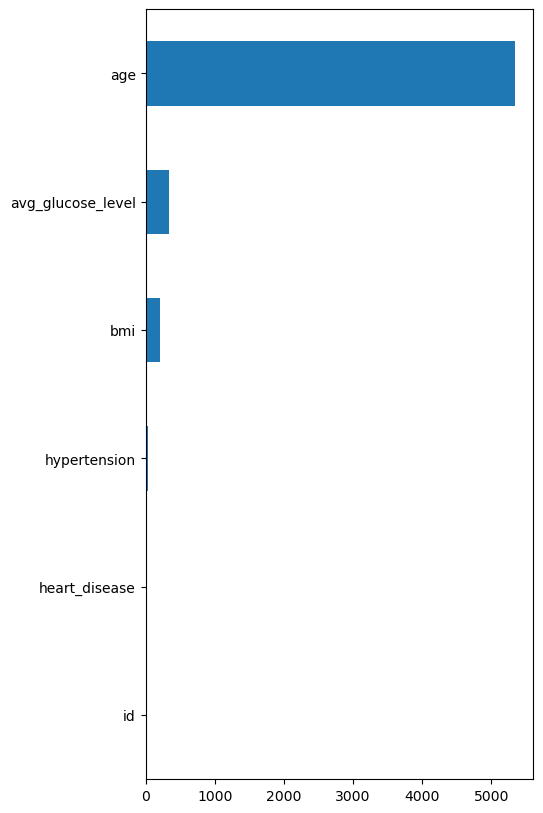

In [30]:
# выводим график усредненных важностей
features.plot.barh(figsize=(5, 10));

In [31]:
# создаем список признаков
features = list(features.index)
features

['id', 'heart_disease', 'hypertension', 'bmi', 'avg_glucose_level', 'age']

In [32]:
# вычисляем оценку AUC-ROC, усредненную по 5 проверочным
# блокам перекрестной проверки (5 моделям со всеми
# признаками)
auc_score_all = output['test_score'].mean()
auc_score_all

0.8278583091677426

In [33]:
# задаем пороговое значение разницы AUC
tol = 0.0001
print("выполнение последовательного удаления признаков")
# создаем список, в который будем
# записывать удаляемые признаки
features_to_remove = []
# создаем список, в который будем
# записывать значение AUC
auc_score_mean_list = []
# создаем список, в который будем
# записывать разницу AUC
diff_auc_list = []
# задаем счетчик для оценки прогресса
count = 1

# итерируем по всем признакам, признаки упорядочены по
# возрастанию важности на основе информационного выигрыша
for feature in features:
    print()
    print("проверяемый признак: ", feature, " признак ", count, " из ", len(features))
    count = count + 1
    # создаем экземляр класса LGBMClassifier
    model = LGBMClassifier(
        random_state=42, learning_rate=0.01,
        n_estimators=300, bagging_fraction=0.5,
        feature_fraction=1, lambda_l1=10)

    # обучаем модели со всеми признаками минус уже удаленные признаки
    # (берем их из списка удаляемых признаков) и оцениваемый признак
    auc_scores = cross_val_score(
        model,
        X_train.drop(features_to_remove + [feature], axis=1),
        y_train,
        scoring='roc_auc',
        cv=5)

    # вычисляем AUC, усредненный по проверочным блокам
    # перекрестной проверки
    auc_score_mean = auc_scores.mean()
    # печатаем усредненное значение AUC
    print("AUC модели после удаления={}".format((auc_score_mean)))
    # добавляем усредненное значение AUC в список
    auc_score_mean_list.append(auc_score_mean)
    # печатаем AUC модели со всеми признаками
    # (опорное значение AUC)
    print("AUC модели со всеми признаками={}".format((auc_score_all)))
    # определяем разницу AUC (если отрицательное значение
    # - удаление признака улучшило AUC)
    diff_auc = auc_score_all - auc_score_mean
    # записываем разницу AUC в список
    diff_auc_list.append(diff_auc)

    # сравниваем разницу AUC с порогом, заданным заранее
    # если разница AUC больше или равна порогу, сохраняем
    if diff_auc >= tol:
        print("Разница AUC={}".format(diff_auc))
        print("сохраняем: ", feature)
    # если разница AUC меньше порога, удаляем
    else:
        print("Разница AUC={}".format(diff_auc))
        print("удаляем: ", feature)
        # если разница AUC меньше порога и мы удаляем признак,
        # мы в качестве нового опорного значения AUC задаем
        # значение AUC для модели с оставшимися признаками
        auc_score_all = auc_score_mean
        # добавляем удаляемый признак в список
        features_to_remove.append(feature)


# формируем датафрейм
df = pd.DataFrame({'feature': features,
 'auc_score_mean': auc_score_mean_list,
'diff_auc_score': diff_auc_list})

# цикл завершен, вычисляем количество
# удаленных признаков
print("ВЫПОЛНЕНО!!")
print("общее количество признаков для удаления: ", len(features_to_remove))

# определяем признаки, которые мы хотим сохранить (не удаляем)
features_to_keep = [x for x in features if x not in features_to_remove]
print("общее количество признаков для сохранения: ", len(features_to_keep))

выполнение последовательного удаления признаков

проверяемый признак:  id  признак  1  из  6
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Info] Number of positive: 109, number of negative: 2639
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[

In [35]:
dgg_new = []
for col in features_to_keep:
    dgg_new.append(df_numeric_del[col])
    
dff1 = pd.DataFrame(dgg_new).T
dff1

,avg_glucose_level,age
0,228.69,67.0
2,105.92,80.0
3,171.23,49.0
4,174.12,79.0
5,186.21,81.0
...,...,...
5104,103.08,13.0
5106,125.20,81.0
5107,82.99,35.0
5108,166.29,51.0
